In [41]:
import sklearn
import cv2

import os
import numpy as np
import pandas as pd

import seaborn as sns
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
normal = './normal/'
stenosis = './stenosis/'

para = os.listdir(normal)
unin = os.listdir(stenosis)

(287, 813, 3)

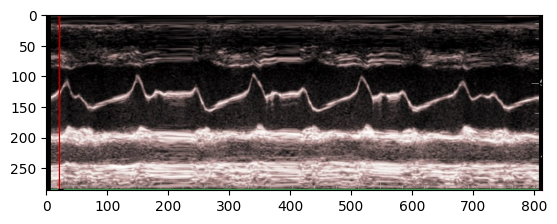

In [43]:
plt.imshow(cv2.imread(normal+para[0]))

img0 = cv2.imread(normal+para[0])
img0.shape

In [44]:
images = []
labels = []

for p in tqdm(para):
    try:
        img = cv2.imread(normal+p)
        img_re = cv2.resize(img,(512,512))
        images.append(np.array(img_re))
        labels.append(0)
    except AttributeError:
        print("")

100%|███████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 231.69it/s]


In [45]:
pd.Series(labels).value_counts()

0    160
Name: count, dtype: int64

(512, 512, 3)

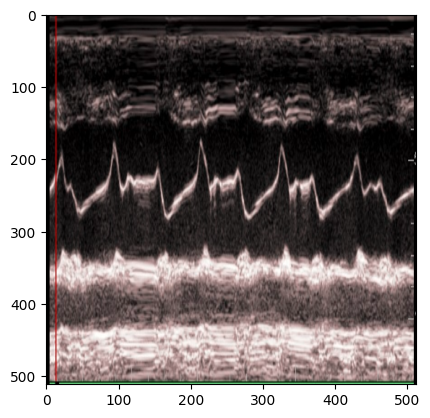

In [46]:
plt.imshow(images[0])

images[0].shape

In [48]:
    
for u in tqdm(unin):
        img = cv2.imread(stenosis+u)
        img_re = cv2.resize(img,(512,512))
        images.append(np.array(img_re))
        labels.append(1)

100%|███████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 207.43it/s]


In [49]:
pd.Series(labels).value_counts()

0    160
1    160
Name: count, dtype: int64

(512, 512, 3)

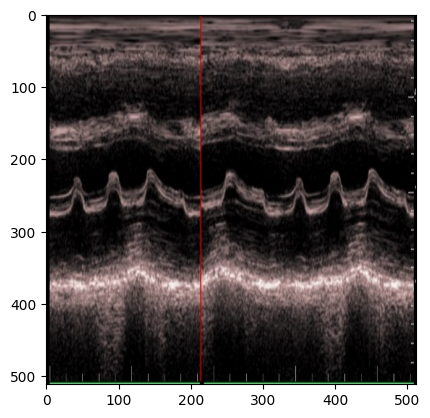

In [50]:
plt.imshow(images[222])

images[222].shape

In [51]:
print("images : "+str(len(images))+" Labels : "+str(len(labels)))

images : 320 Labels : 320


In [52]:
data = np.array(images)
data_label = np.array(labels)

In [53]:
data.shape

(320, 512, 512, 3)

In [54]:
data = data/255.

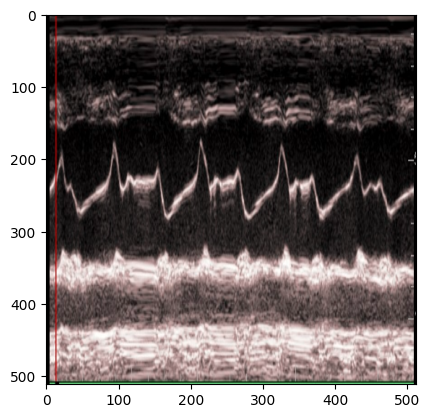

In [55]:
plt.imshow(data[0])

In [56]:
X_train, X_test , y_train , y_test = train_test_split(data,data_label, test_size=0.2, random_state = 42)
X_train, X_val , y_train , y_val = train_test_split(X_train,y_train, test_size=0.2, random_state = 42)

In [57]:
print(str(len(X_train)) + " " + str(len(y_train)))
print(str(len(X_test)) + " " + str(len(y_test)))
print(str(len(X_val)) + " " + str(len(y_val)))

204 204
64 64
52 52


1


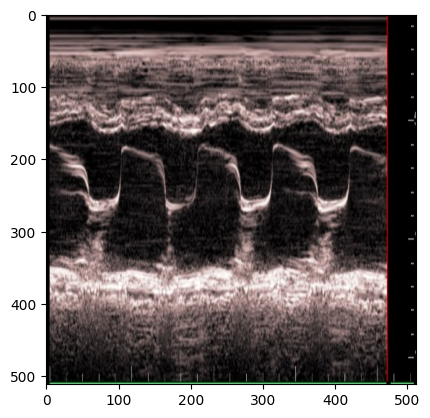

In [58]:
plt.imshow(X_test[0])
print(y_test[0])

In [59]:
X_train[0].shape

(512, 512, 3)

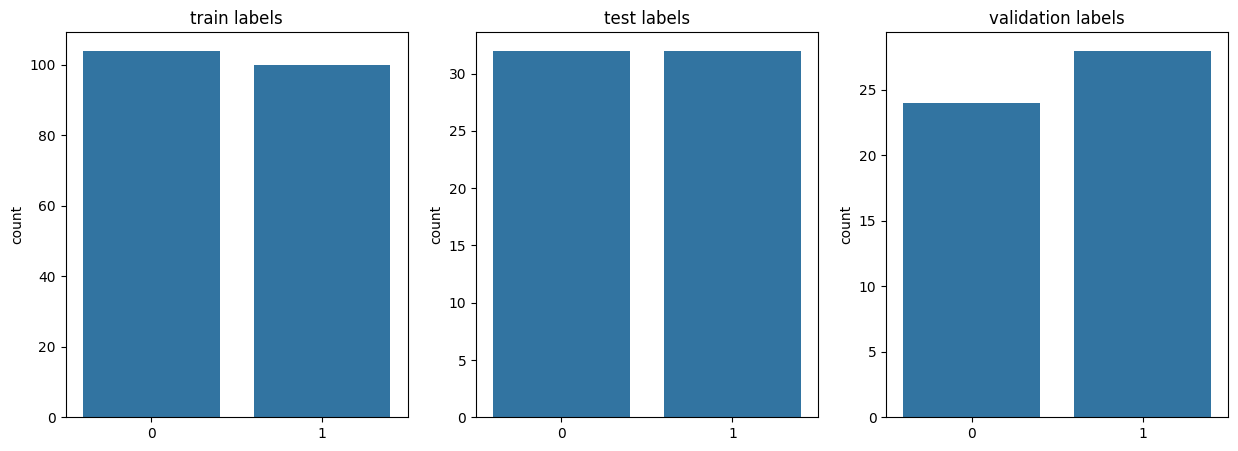

In [60]:
plt.figure(figsize=(15,5))
n=0
for i,j in zip([y_train,y_test, y_val] , ['train labels', 'test labels','validation labels']):
    n += 1
    plt.subplot(1, 3, n)
    sns.countplot(x=i)
    plt.title(j)
plt.show()

In [61]:
y_test[:10]

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [62]:
y_train[:10]

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1])

In [63]:
y_val[:10]

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 0])

In [64]:
import tensorflow as tf



from keras.utils import plot_model

In [65]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)

In [66]:
import tensorflow as tf

In [67]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten, Dense, Activation
from keras import optimizers
from keras.models import Sequential

In [68]:

model = Sequential()

model.add(Conv2D(32, 3, 3, padding='same', input_shape=(512,512,3), activation='relu'))
model.add(Conv2D(32, 3, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same', data_format='channels_last',strides=(1, 1)))

model.add(Conv2D(64, 3, 3, padding='same', activation='relu'))
model.add(Conv2D(64, 3, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same', data_format='channels_last',strides=(1, 1)))

model.add(Conv2D(128, 3, 3, padding='same', activation='relu'))
model.add(Conv2D(128, 3, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same', data_format='channels_last',strides=(1, 1)))

model.add(Conv2D(256, 3, 3, padding='same', activation='relu'))
model.add(Conv2D(256, 3, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same', data_format='channels_last',strides=(1, 1)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 171, 171, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 57, 57, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 57, 57, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 19, 19, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [70]:
model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=0.0001),
            metrics=['accuracy'])

c:\users\vcvis\appdata\local\programs\python\python38\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [71]:
history = model.fit(X_train, y_train,validation_data=(X_val,y_val), batch_size=64, verbose=1 ,epochs=20)

Epoch 1/20
4/4 [==============================] - 4s 284ms/step - loss: 0.6931 - accuracy: 0.4608 - val_loss: 0.6929 - val_accuracy: 0.5385
Epoch 2/20
4/4 [==============================] - 0s 124ms/step - loss: 0.6926 - accuracy: 0.6373 - val_loss: 0.6923 - val_accuracy: 0.4615
Epoch 3/20
4/4 [==============================] - 1s 140ms/step - loss: 0.6914 - accuracy: 0.6618 - val_loss: 0.6909 - val_accuracy: 0.4615
Epoch 4/20
4/4 [==============================] - 0s 107ms/step - loss: 0.6887 - accuracy: 0.7745 - val_loss: 0.6859 - val_accuracy: 0.9808
Epoch 5/20
4/4 [==============================] - 0s 129ms/step - loss: 0.6843 - accuracy: 0.9853 - val_loss: 0.6772 - val_accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 0s 129ms/step - loss: 0.6766 - accuracy: 0.9608 - val_loss: 0.6656 - val_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 0s 125ms/step - loss: 0.6608 - accuracy: 0.9755 - val_loss: 0.6448 - val_accuracy: 0.9808
Epoch 8/20
4/4 [====

In [72]:
from keras.models import load_model




model=load_model("mmode.h5")

In [73]:
print(model.evaluate(X_test, y_test,batch_size=1))
model.save("mmode.h5")

64/64 [==============================] - 1s 7ms/step - loss: 0.0775 - accuracy: 0.9844
[0.07751842588186264, 0.984375]


64/64 [==============================] - 1s 7ms/step
AUC: 1.00000


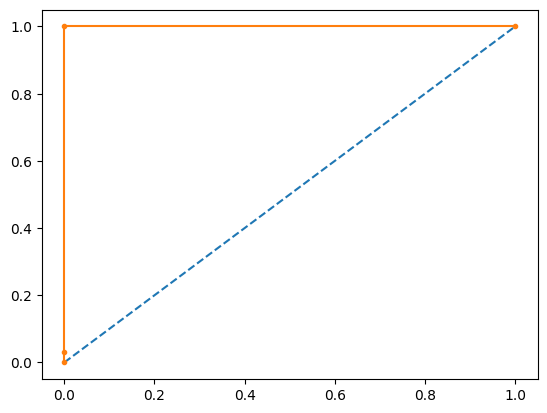

<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>.


In [74]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,precision_recall_curve
from matplotlib import pyplot
from sklearn.metrics import roc_curve, auc # roc curve tools
#from sklearn.metrics import precision_recall_curve
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

predict = model.predict(X_test, batch_size=1)
#print(predict)
# calculate AUC
auc = roc_auc_score(y_test, predict)
print('AUC: %.5f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, predict)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()
print("<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>.")

52/52 [==============================] - 0s 5ms/step
AUC: 1.00000


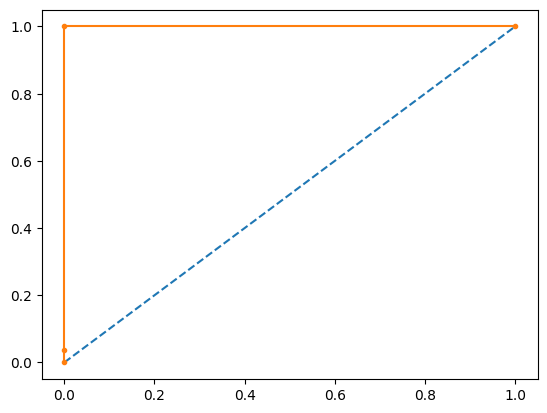

<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>.


In [75]:
predict = model.predict(X_val, batch_size=1)
# calculate AUC
auc = roc_auc_score(y_val.ravel(), predict.ravel())
print('AUC: %.5f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_val.ravel(), predict.ravel())
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()
print("<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>.")

In [76]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,precision_recall_curve
from matplotlib import pyplot
from sklearn.metrics import roc_curve, auc # roc curve tools
#from sklearn.metrics import precision_recall_curve
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [77]:
predictions = model.predict(X_test,batch_size=1)
from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, predictions)
print(average_precision)

64/64 [==============================] - 0s 5ms/step
1.0


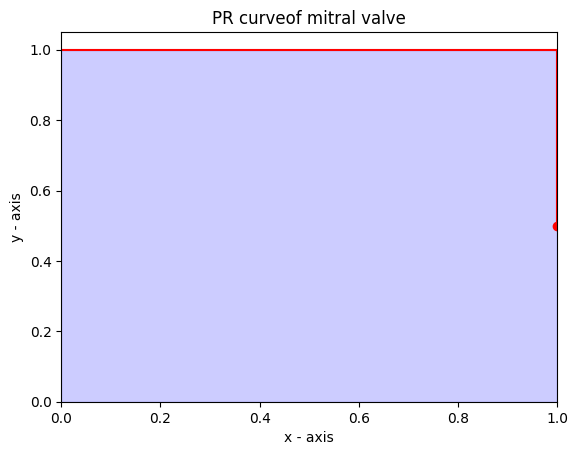

<Figure size 640x480 with 0 Axes>

In [78]:
from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, predictions)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')

plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))


plt.plot(recall, precision,'ro-',markevery=100) 
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('PR curveof mitral valve') 
  
# function to show the plot 
plt.show()
plt.savefig('pr.png')

64/64 [==============================] - 0s 5ms/step


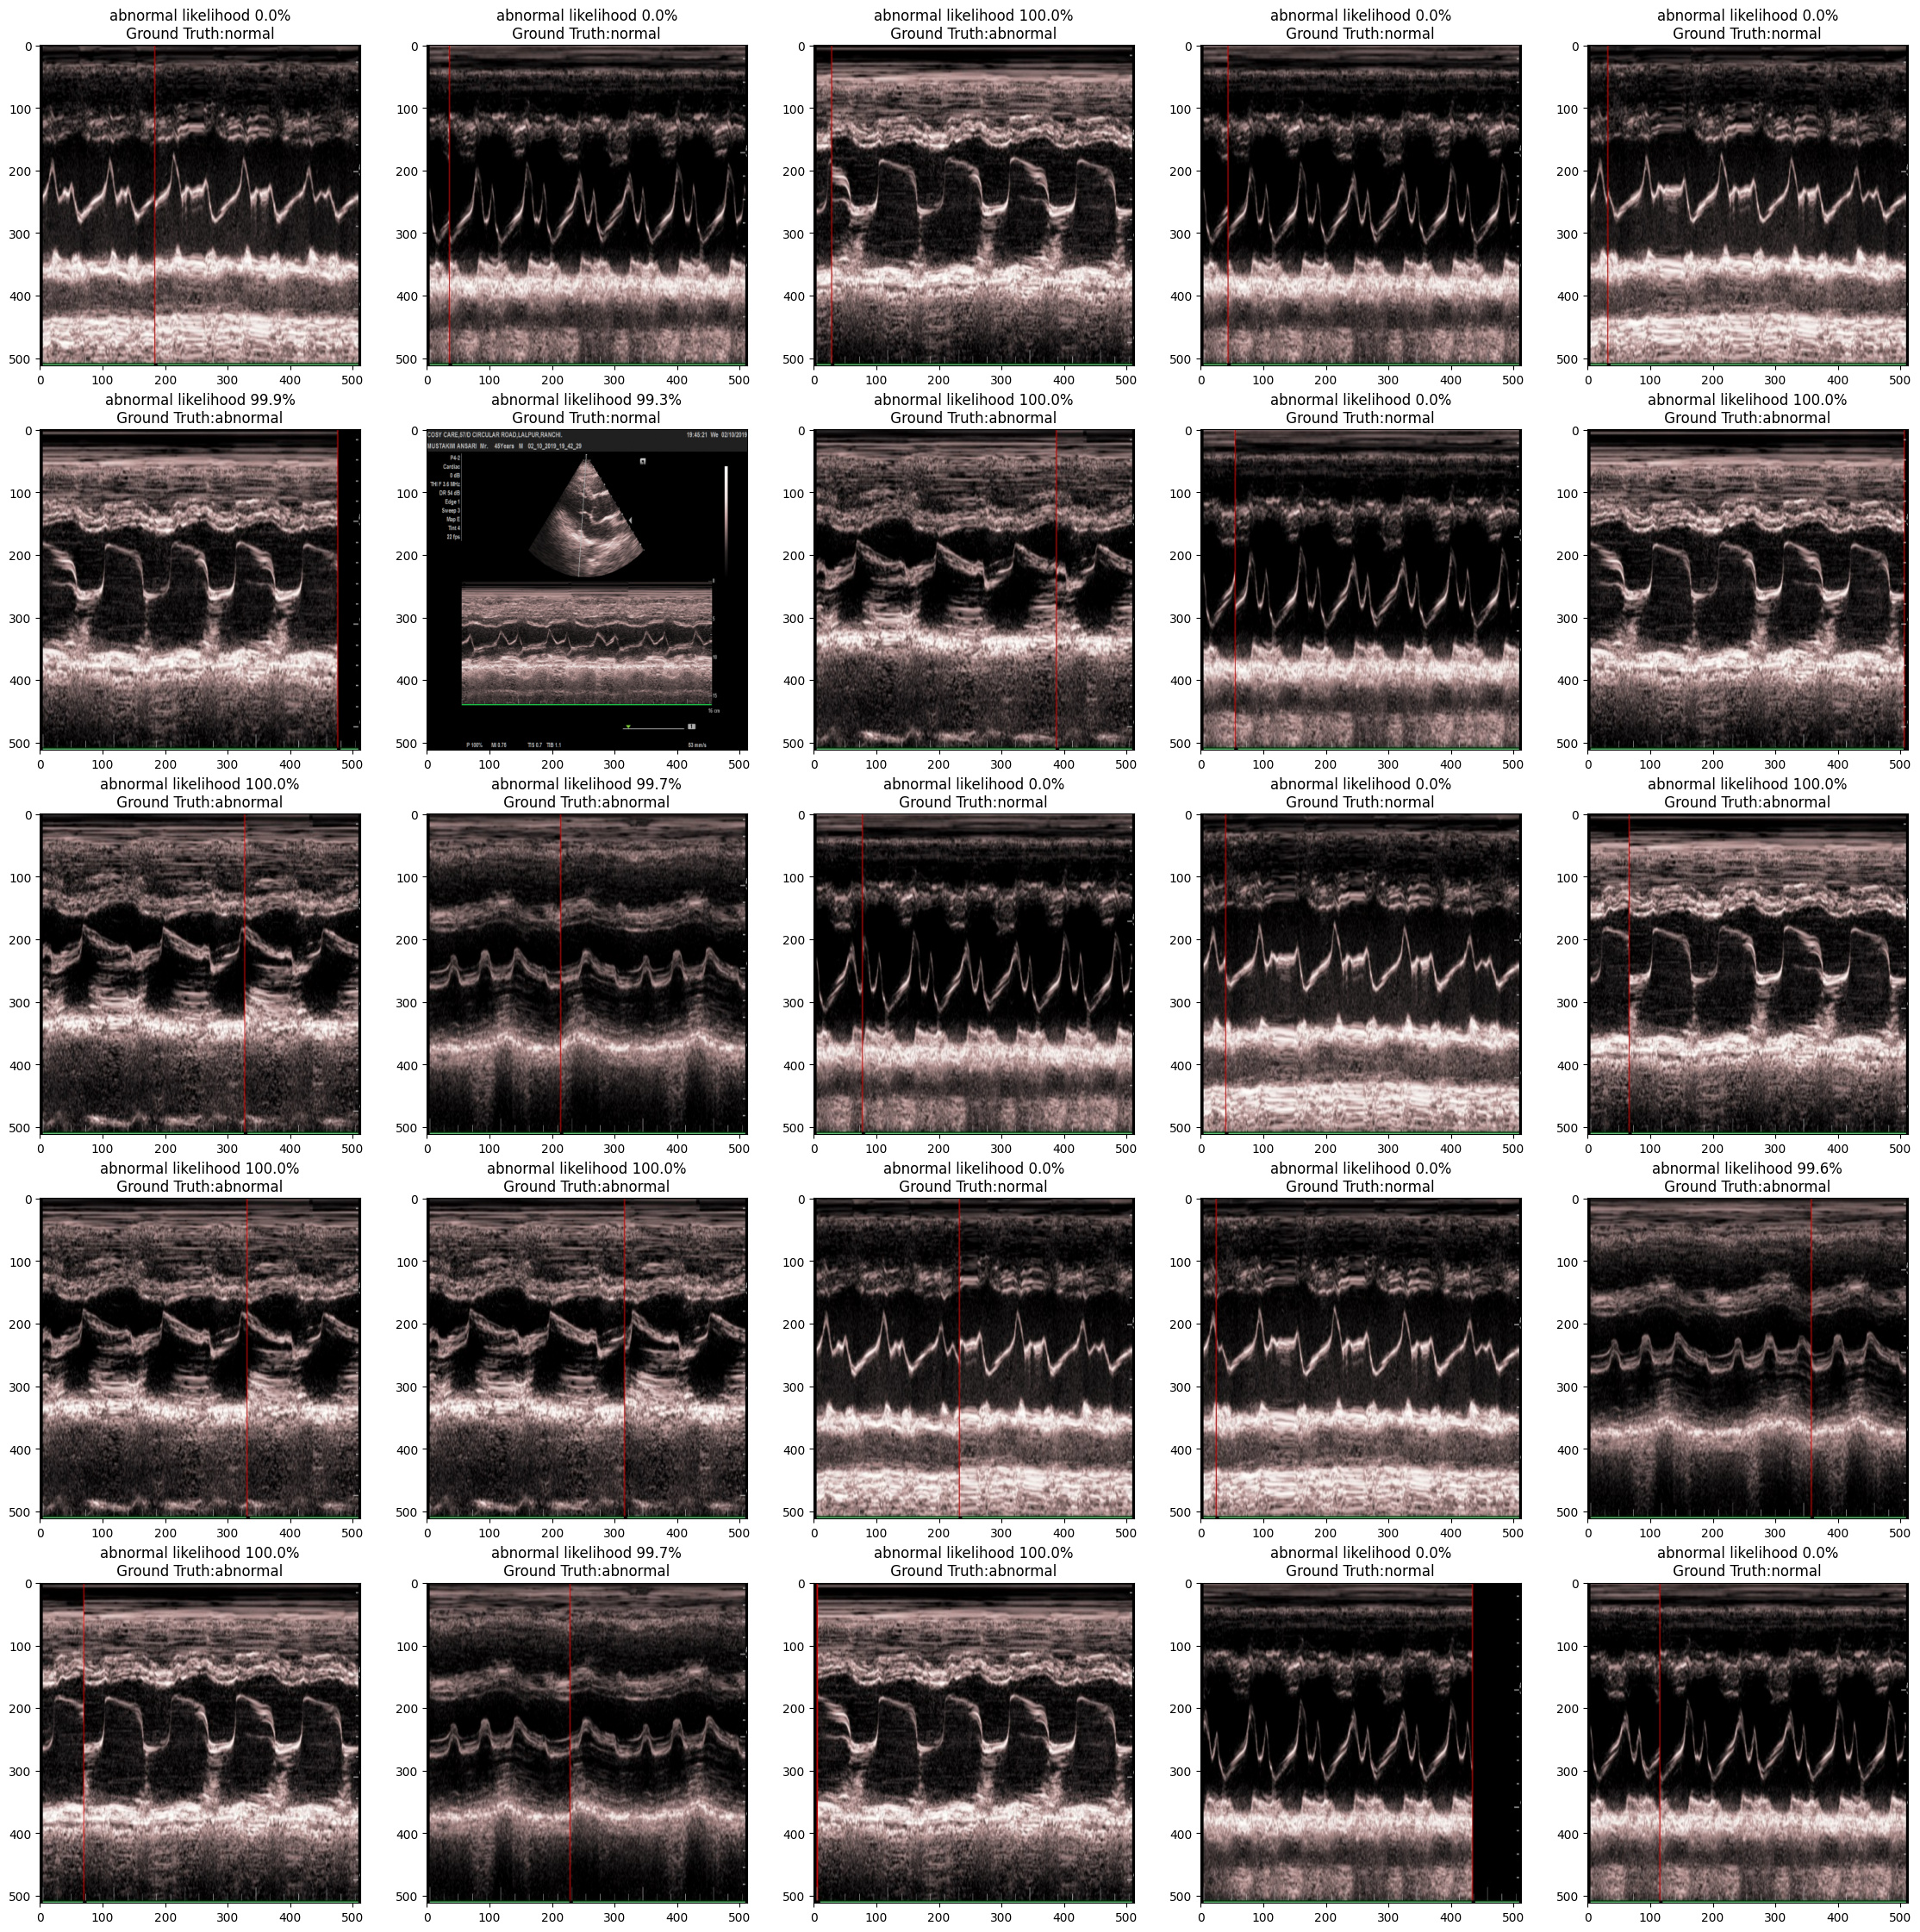

In [79]:
predictions = model.predict(X_test,batch_size=1)

fig=plt.figure(figsize=(28, 28))
columns = 5
rows = 5
random_number = np.random.randint(0,X_test.shape[0]-26)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_test[i+random_number])
    gt = ['normal', 'abnormal']
    plt.title('abnormal likelihood {:.1%}\n Ground Truth:{} '.format(float(predictions[i+random_number]), gt[y_test[i+random_number]]))
    
plt.show()

In [80]:
from sklearn.metrics import classification_report, confusion_matrix

threshold = 0.65
predictions_final = [int(pred>threshold) for pred in predictions]

print(classification_report(y_test, predictions_final))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.97      1.00      0.98        32

    accuracy                           0.98        64
   macro avg       0.98      0.98      0.98        64
weighted avg       0.98      0.98      0.98        64



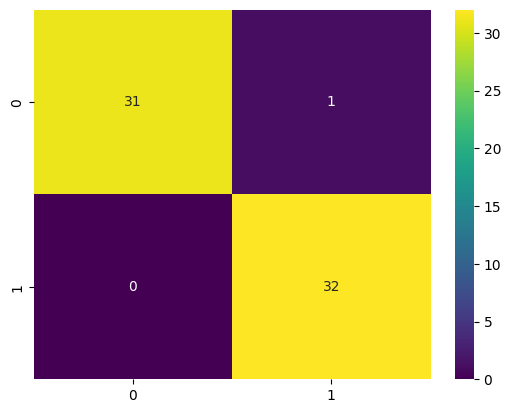

[[31  1]
 [ 0 32]]
None


In [81]:
def draw_confusion_matrix(true,preds):
    conf_matx = confusion_matrix(true, preds)
    sns.heatmap(conf_matx, annot=True,annot_kws={"size": 10},fmt='g', cbar=True, cmap="viridis")
    plt.show()
    print(conf_matx)
print(draw_confusion_matrix(y_test, predictions_final))

In [82]:
import numpy as np
from keras.utils import load_img
import keras.utils as image
test_image = image.load_img('240.tif', target_size=(128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
#raining_set.class_indices
if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'abnormal'
    
print(prediction)

#print(training_set.class_indices)
print(result)

if prediction=='abnormal':
    print("normal",1-result)
else:
    print("abnormal",1-result)

1/1 [==============================] - 1s 793ms/step
normal
[[1.]]
abnormal [[0.]]
